In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('trawlers.csv')

In [3]:
# Drop rows where is_fishing is not 1 or 0
df = df[df['is_fishing'].isin([0, 1])]

# Drop unnecessary parameters
df.drop(df.columns.difference(['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']), axis=1, inplace=True)
df

,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
60646,0.000000,0.000000,0.0,128.000000,52.458717,4.581316,0.0
60647,0.000000,0.000000,0.0,128.000000,52.458733,4.581316,0.0
60648,0.000000,0.000000,0.0,128.000000,52.458698,4.581267,0.0
60649,0.000000,0.000000,0.0,128.000000,52.458698,4.581234,0.0
60650,0.000000,0.000000,0.0,128.000000,52.458683,4.581183,0.0
...,...,...,...,...,...,...,...
4324371,23344.662109,54560.550781,10.3,123.300003,-40.340950,172.884033,0.0
4324372,21212.683594,54376.968750,10.2,120.400002,-40.362152,172.927811,0.0
4324373,18681.083984,55315.910156,10.1,124.400002,-40.393635,172.991333,0.0
4324374,16999.582031,56637.820312,10.4,121.099998,-40.420013,173.044662,0.0


In [4]:
# Drop rows with null values
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop('is_fishing', axis=1)
y = df['is_fishing']

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train an SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [7]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8988166695249529
F1 Score: 0.8631831181881426
Precision: 0.8318063314711359
Recall: 0.8970198409510804
Confusion Matrix:
[[20279  2258]
 [ 1282 11167]]


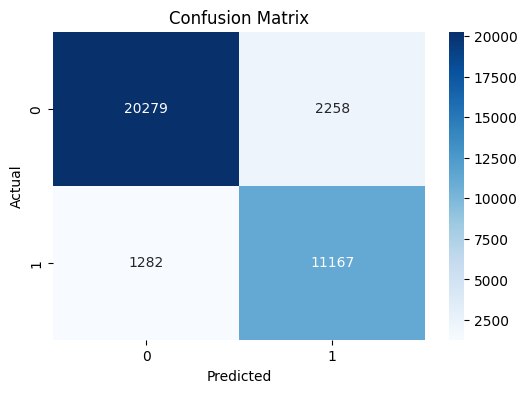

In [9]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


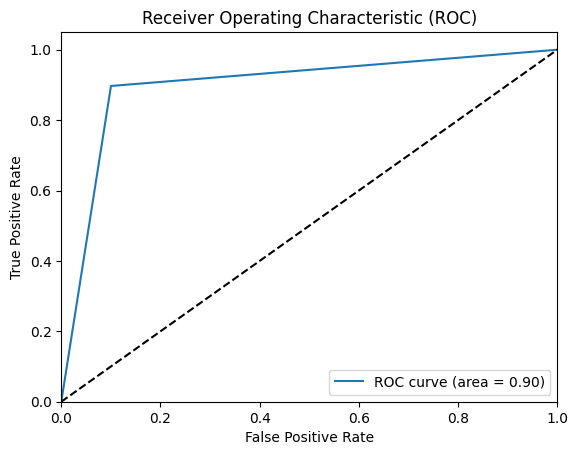

In [10]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
import joblib
joblib.dump(clf, 'SVM_model.pkl')


['SVM_model.pkl']